## PCA Exercise - Dimensionality reduction

We will test some of the dimensionality reduction techniques on sklearn's [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine).

In [73]:
# import libraries
import numpy as np
import scipy as sp
import pandas as pd
import plotly.graph_objects as go
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kurtosis, skewtest

%matplotlib inline

_____________________
#### Part 1: Interpreting PCs

1. Load up the wine dataset and run a PCA over it. 
    - **Note:** Don't forget to scale your data and check for any missing values before running your PCA.


2. Extract the two best principal components (n_components=2). 

3. Create a 2D PCA Scatter Plot and colour code the different classes. Are there any clear separations of the various wine classes?

4. Create a loading plot with the two principal components. Identify which features influence PC-1 and which features influence PC-2. 

5. **Stretch** The combination of the previous two plots is called a PCA biplot. Create a PCA biplot.


### 1. Load wine dataset and run PCA.

In [74]:
# import and load the dataset
from sklearn.datasets import load_wine
data = load_wine()
wine = data.data
labels = data.target

In [75]:
df_wine = pd.DataFrame(wine)
df_wine.shape

(178, 13)

#### 1.A Look for null values.

In [76]:
# find any empty or null values
# drop these rows if necessary
df_wine.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

#### 1.B Describe dataset to see if scaling is necessary. Scale as appropriate.

In [77]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [78]:
df_wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [79]:
# test for normality
stat, pval = shapiro(df_wine)
alpha = 0.05

if pval < alpha:
    print('does not exhibit a normal distribution')
else:
    print('follows a normal distribution')
    
k = kurtosis(df_wine)
s = skewtest(df_wine)

print('kurtosis:', k)
print('skewness:', s)

does not exhibit a normal distribution
kurtosis: [-0.8622601   0.25734829  1.07857613  0.44082314  2.01280601 -0.8458573
 -0.88936501 -0.65295221  0.50567101  0.33736976 -0.3680254  -1.08967533
 -0.27499971]
skewness: SkewtestResult(statistic=array([-0.28856224,  4.94825233, -0.98436737,  1.18332797,  5.15620954,
        0.48510495,  0.1421145 ,  2.42469219,  2.7534587 ,  4.29955297,
        0.11827483, -1.68975288,  3.88676152]), pvalue=array([7.72916393e-01, 7.48827929e-07, 3.24934916e-01, 2.36679190e-01,
       2.51998884e-07, 6.27601901e-01, 8.86989562e-01, 1.53213713e-02,
       5.89692101e-03, 1.71142971e-05, 9.05849900e-01, 9.10752424e-02,
       1.01590472e-04]))


In [80]:
# observations may skew the dataset towards certain features
from sklearn.preprocessing import MinMaxScaler

wine_scaled = MinMaxScaler().fit_transform(df_wine)
wine_scaled 

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

#### 1.C Run PCA on scaled dataset.

In [81]:
from sklearn.decomposition import PCA

# Find the principle components of the dataset
pca = PCA()
pca.fit(wine_scaled)

# Transform the data to its low-dimensional representation
reduced_wines = pca.transform(wine_scaled)
print('Low-dimensional dataset shape: {}'.format(reduced_wines.shape))

Low-dimensional dataset shape: (178, 13)


_____________________
#### Part 2: PCA in practice
    
1. Plot a scree plot to determine the number of principal components you want to keep. Use the elbow rule.

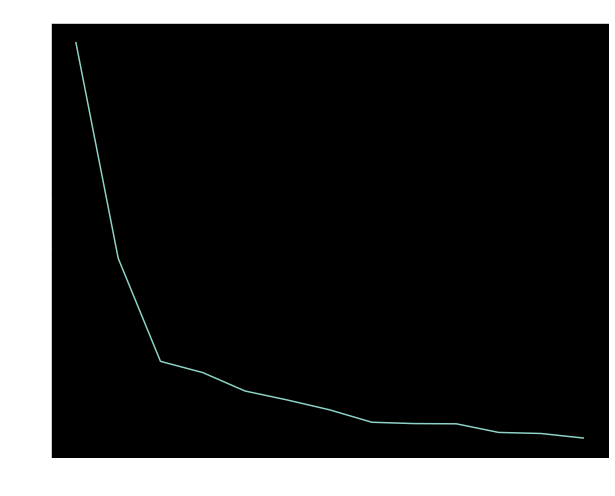

In [82]:
evr = pca.explained_variance_ratio_

# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(evr)
plt.figure(figsize=(10,8))
plt.title('skree plot')
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')
plt.plot(np.arange(pca.n_components_) + 1, evr)

2. Create a cumulative explained_variance_ratio plot. Determine the number of principal components you want to keep. Use the elbow rule. 

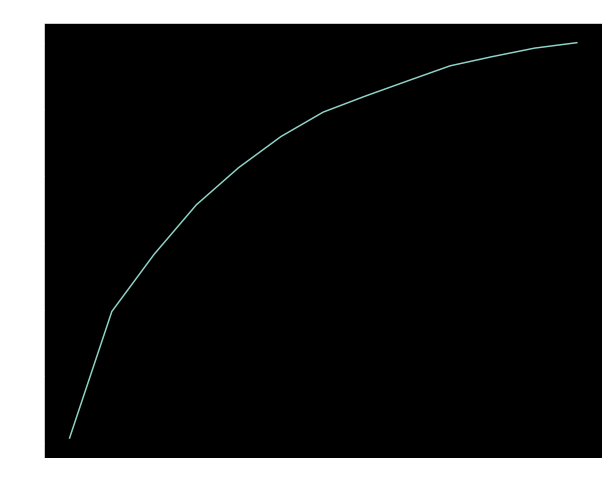

In [83]:
plt.figure(figsize=(10,8))
plt.title('C. Variance Ratio Plot')
plt.xlabel('PC number')
plt.ylabel('% cumulative variance')
plt.plot(np.arange(pca.n_components_) + 1, np.cumsum(evr))

3. Refit your PCA with the chosen optimal number of principal components and project the principal components to a DataFrame. Also, you should name the columns of the DataFrame appropriately. 

In [93]:
# fit data based on reduced features
pca = PCA(n_components=2)
pca.fit(wine_scaled)

optimized_wines = pca.transform(wine_scaled)

df_wine_pca = pd.DataFrame(optimized_wines, columns=['PC1', 'PC2'])

4. Export the data with the new features to a CSV file. The number of rows should be the same as in the original dataset.

In [94]:
from pathlib import Path

data_path = './data'
df_wine_pca.to_csv(Path(data_path) / 'df_wine_pca.csv', sep=';')

_________________________
#### Part 3: Stretch Activities (Optional)

1. Plot a variable correlation plot. 

    - **Hint:** We can create a scatter plot with 1st component on the x-axis and the second component on y-axis. 
    - **Hint:** The length of each component is equal to the number of columns (features) we have in our data before PCA. Points in the graph that are close to each other are similar features. We need to annotate the points with feature names.

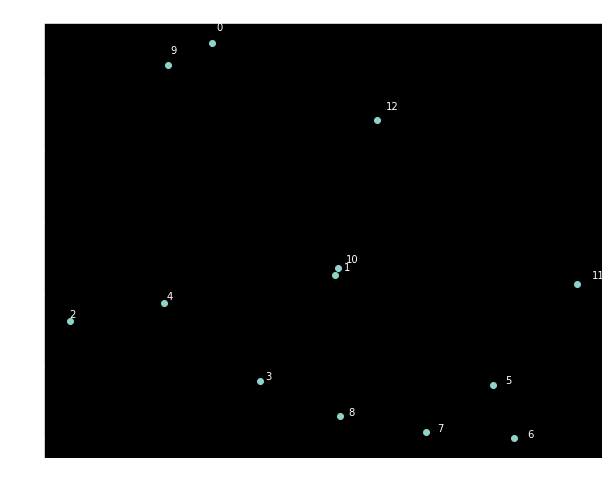

In [125]:
# df_wine_pca.sort_values(by='PC1', inplace=True)

plt.figure(figsize=(10,8))
plt.title('variable correlation plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(abs(pca.components_[0]), abs(pca.components_[1]))
for i, coord in enumerate(zip(abs(pca.components_[0]), abs(pca.components_[1]))):
    plt.annotate(str(i), (coord[0], coord[1]), (coord[0]*1.03, coord[1]*1.03))